# LSTM & RNN Model for classification

**Source:** 



1.   Titre: Multi-Class Text Classification with LSTM 
2.   Site: Towards Data Science
3.   Author: Susan Li
4.   URL: https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17\


 

**Import the necessary modules**

In [76]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
import re
import string
import spacy
from nltk.corpus import stopwords
import nltk
import nltk.data
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import nltk
nltk.download('stopwords')
!pip install datasets
from datasets import load_dataset
!pip install deplacy
!python -m spacy download fr_core_news_sm
import pkg_resources,imp
imp.reload(pkg_resources)
import spacy
nlp=spacy.load("fr_core_news_sm")
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

     |████████████████████████████████| 14.7 MB 5.1 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')


<module 'pkg_resources' from '/usr/local/lib/python3.7/dist-packages/pkg_resources/__init__.py'>

In [23]:
dataset_train = load_dataset("oscarfossey/NLP_Pole_emploi", data_files='train_dataset.csv')
dataset_val = load_dataset("oscarfossey/NLP_Pole_emploi", data_files='val_dataset.csv')

Using custom data configuration oscarfossey--NLP_Pole_emploi-c0261a038d48936e


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/oscarfossey--NLP_Pole_emploi-c0261a038d48936e/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Using custom data configuration oscarfossey--NLP_Pole_emploi-68372c9a27ced334


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/oscarfossey--NLP_Pole_emploi-68372c9a27ced334/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
df_train = pd.DataFrame(dataset_train['train'])
df_val = pd.DataFrame(dataset_val['train'])

In [25]:
df_train.head(1)

,textual description,code_rome,categorie,sub_categorie,sub_sub_categorie,name,text_length
0,Nous recherchons pour le compte de notre clien...,I1305,I,13,5,Installation et maintenance électronique,304


**Preprocessing du texte**

In [26]:
stopwords = nltk.corpus.stopwords.words('french')
nlp = spacy.load("fr_core_news_sm")

In [27]:
def preprocessing(text):
    text = text.lower()
    text = text.replace('(', ' ').replace(')', ' ').replace('.', ' ').replace('  ', ' ')  #drop '(', ')', '.'
    text = nlp(text)
    #words = [token.text for token in sent for sent in doc.sents if not token.text in set(stopwords)]
    words = [token.lemma_ for sent in text.sents for token in sent if not token.text in set(stopwords)]
    string = ' '.join(words)
    return string

**Raw Text**

In [28]:
df_train.iloc[0]['textual description']

"Nous recherchons pour le compte de notre client basé à Crepy en Valois un(e) Electromecanicien.les tâches sont:Suivi de la disponibilité du matériel nettoyage, réparations des éléments défectueux Rédaction des fiches techniques d'intervention Participation à l'amélioration des procédures de maintenance "

**Preprocessed text**

In [29]:
preprocessing(df_train.iloc[0]['textual description'])

'rechercher compte client baser crepy valois e electromecanicien tâche : suivre disponibilité matériel nettoyage , réparation élément défectueux rédaction fiche technique de intervention participation le amélioration procédure maintenance'

In [30]:
df_train['textual description'] = df_train['textual description'].apply(preprocessing)

In [31]:
df_val['textual description'] = df_val['textual description'].apply(preprocessing)

In [32]:
train_X = df_train['textual description']   
train_y = df_train['categorie']   
val_X = df_val['textual description']
val_y = df_val['categorie']

**Vectorization**

In [33]:
#tf idf
tf_idf = TfidfVectorizer()
#applying tf idf to training data
X_train_vect = tf_idf.fit_transform(train_X)
#applying tf idf to training data
X_train_vect = tf_idf.transform(train_X)

In [34]:
train_X

0        rechercher compte client baser crepy valois e ...
1        charge superviser équipe de agent service hosp...
2        le association pep 71 recrute le ime orbizepou...
3        contrat formation alternance groupe alternance...
4        trajectoire conseils carrière , cabinet recrut...
                               ...                        
38635    jubil interim albi recherche peintre bâtiment ...
38636    descriptif poste : cadre développement implant...
38637    charger e tenue secrétariat   répondre mail , ...
38638    rattacher e chef de atelier garage , exercer p...
38639    responsable magasin assistant , confier missio...
Name: textual description, Length: 38640, dtype: object

In [35]:
df_train

,textual description,code_rome,categorie,sub_categorie,sub_sub_categorie,name,text_length
0,rechercher compte client baser crepy valois e ...,I1305,I,13,5,Installation et maintenance électronique,304
1,charge superviser équipe de agent service hosp...,N3103,N,31,3,Navigation fluviale,3214
2,le association pep 71 recrute le ime orbizepou...,K1305,K,13,5,Intervention sociale et familiale,3124
3,contrat formation alternance groupe alternance...,G1302,G,13,2,Optimisation de produits touristiques,1559
4,"trajectoire conseils carrière , cabinet recrut...",H2505,H,25,5,Encadrement d'équipe ou d'atelier en matériaux...,1294
...,...,...,...,...,...,...,...
38635,jubil interim albi recherche peintre bâtiment ...,F1606,F,16,6,Peinture en bâtiment,266
38636,descriptif poste : cadre développement implant...,M1806,M,18,6,Conseil et maîtrise d'ouvrage en systèmes d'in...,1376
38637,"charger e tenue secrétariat répondre mail , ...",M1607,M,16,7,Secrétariat,337
38638,"rattacher e chef de atelier garage , exercer p...",I1604,I,16,4,Mécanique automobile et entretien de véhicules,551


In [90]:
train_X.to_csv('train_X.csv',index=False)

In [91]:
train_y.to_csv('train_y.csv',index=False)   
val_X.to_csv('val_X.csv',index=False)
val_y.to_csv('val_y.csv',index=False)

In [9]:
dataset_train_X = pd.DataFrame(dataset_train_X)

In [37]:
dataset_train_X

,train
0,{'categorie': 'I'}
1,{'categorie': 'N'}
2,{'categorie': 'K'}
3,{'categorie': 'G'}
4,{'categorie': 'H'}
...,...
38635,{'categorie': 'F'}
38636,{'categorie': 'M'}
38637,{'categorie': 'M'}
38638,{'categorie': 'I'}


In [11]:
dataset_train_y = pd.DataFrame(dataset_train_y)

In [19]:
dataset_train_y['train'][0]

{'categorie': 'I'}

In [38]:
df_train['textual description']

0        rechercher compte client baser crepy valois e ...
1        charge superviser équipe de agent service hosp...
2        le association pep 71 recrute le ime orbizepou...
3        contrat formation alternance groupe alternance...
4        trajectoire conseils carrière , cabinet recrut...
                               ...                        
38635    jubil interim albi recherche peintre bâtiment ...
38636    descriptif poste : cadre développement implant...
38637    charger e tenue secrétariat   répondre mail , ...
38638    rattacher e chef de atelier garage , exercer p...
38639    responsable magasin assistant , confier missio...
Name: textual description, Length: 38640, dtype: object

# LSTM Modelling



*   Vectorize jobs description text, by turning each text into either a sequence of integers or into a vector
*   Limit the data to the top 5,000 words
*   Set the number of words in each description at 250 words



In [41]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_train['textual description'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 98800 unique tokens.


In [42]:
X = tokenizer.texts_to_sequences(df_train['textual description'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (38640, 250)


**Converting categorical numbers to dummies**

In [44]:
Y = pd.get_dummies(train_y).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (38640, 14)


**Establishing both training data set & test data set**

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(34776, 250) (34776, 14)
(3864, 250) (3864, 14)


In [124]:
print(Y_test)
y_test=prediction(Y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [125]:
y_test

['K',
 'E',
 'K',
 'H',
 'N',
 'D',
 'D',
 'I',
 'K',
 'H',
 'F',
 'N',
 'K',
 'F',
 'F',
 'C',
 'F',
 'K',
 'G',
 'H',
 'I',
 'F',
 'K',
 'H',
 'D',
 'D',
 'F',
 'F',
 'F',
 'F',
 'F',
 'C',
 'M',
 'I',
 'J',
 'K',
 'D',
 'H',
 'N',
 'J',
 'N',
 'H',
 'C',
 'H',
 'H',
 'J',
 'C',
 'D',
 'J',
 'F',
 'A',
 'I',
 'B',
 'K',
 'N',
 'I',
 'E',
 'A',
 'N',
 'H',
 'K',
 'N',
 'E',
 'F',
 'G',
 'F',
 'N',
 'H',
 'M',
 'K',
 'F',
 'K',
 'K',
 'G',
 'E',
 'H',
 'H',
 'D',
 'F',
 'N',
 'D',
 'G',
 'H',
 'N',
 'K',
 'G',
 'D',
 'K',
 'G',
 'D',
 'A',
 'F',
 'H',
 'H',
 'K',
 'N',
 'N',
 'D',
 'J',
 'H',
 'D',
 'C',
 'A',
 'N',
 'G',
 'E',
 'M',
 'E',
 'I',
 'M',
 'H',
 'G',
 'N',
 'I',
 'G',
 'L',
 'G',
 'M',
 'N',
 'E',
 'K',
 'G',
 'H',
 'I',
 'F',
 'N',
 'N',
 'K',
 'J',
 'H',
 'D',
 'M',
 'A',
 'K',
 'D',
 'D',
 'M',
 'N',
 'J',
 'D',
 'M',
 'G',
 'J',
 'I',
 'I',
 'K',
 'J',
 'I',
 'D',
 'D',
 'N',
 'K',
 'H',
 'G',
 'G',
 'M',
 'N',
 'M',
 'H',
 'J',
 'K',
 'K',
 'I',
 'I',
 'A',
 'H',
 'M'



*   The first layer is the embedded layer that uses 100 length vectors to represent each word.
*   SpatialDropout1D performs variational dropout in NLP models.
*   The next layer is the LSTM layer with 100 memory units
*   The output layer must create 13 output values, one for each class.
*    Activation function is softmax for multi-class classification. 
*    Because it is a multi-class classification problem, categorical_crossentropy is used as the loss function

In [51]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(14, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64



In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 250, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 14)                1414      
                                                                 
Total params: 5,081,814
Trainable params: 5,081,814
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/5
490/490 [==============================] - 374s 755ms/step - loss: 2.1170 - accuracy: 0.3065 - val_loss: 1.8045 - val_accuracy: 0.4043
Epoch 2/5
490/490 [==============================] - 370s 755ms/step - loss: 1.5889 - accuracy: 0.5010 - val_loss: 1.4865 - val_accuracy: 0.5497
Epoch 3/5
490/490 [==============================] - 372s 759ms/step - loss: 1.2791 - accuracy: 0.6253 - val_loss: 1.2975 - val_accuracy: 0.6366
Epoch 4/5
490/490 [==============================] - 370s 756ms/step - loss: 1.0295 - accuracy: 0.7091 - val_loss: 1.2549 - val_accuracy: 0.6633
Epoch 5/5
490/490 [==============================] - 371s 756ms/step - loss: 0.8910 - accuracy: 0.7497 - val_loss: 1.2093 - val_accuracy: 0.6737


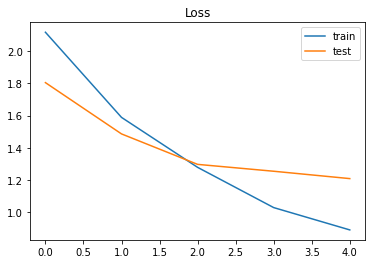

In [54]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

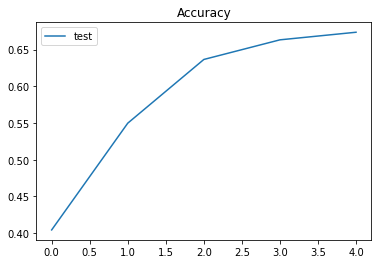

In [74]:
plt.title('Accuracy')
plt.plot(history.history['val_accuracy'], label='test')
plt.plot(history.history['val_accuracy'], label='train')
plt.legend()
plt.show();

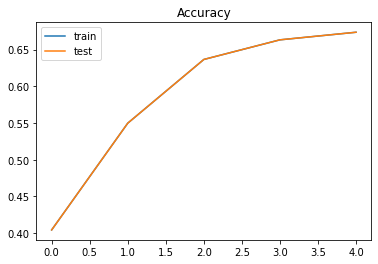

In [75]:
plt.title('Accuracy')
plt.plot(history.history['val_accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')

plt.legend()
plt.show();

In [98]:
from joblib import dump, load
dump(model, 'model_lstm.joblib')

INFO:tensorflow:Assets written to: ram://119ab761-14a6-4569-bf59-3112856f5a26/assets


INFO:tensorflow:Assets written to: ram://119ab761-14a6-4569-bf59-3112856f5a26/assets


['model_lstm.joblib']

In [99]:
lstm_loaded = load('model_lstm.joblib')

In [126]:
y_pred = lstm_loaded.predict(X_test)

In [127]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'N', 'M']
def prediction(L):
  M=[]
  for i in range(len(L)):
    M.append(labels[np.argmax(L[i])])
  return(M)



In [128]:
y_prediction=prediction(y_pred)

In [105]:
new_offer = ['nous voulons une personne qualifie en electronique et en connaissance des condensateurs']
seq = tokenizer.texts_to_sequences(new_offer)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'N', 'M']
print(pred, labels[np.argmax(pred)])

[[0.04633475 0.03861388 0.00549747 0.00709803 0.073737   0.02435552
  0.00958872 0.4592623  0.02357451 0.03715425 0.2124053  0.00473682
  0.02227955 0.03536194]] H


In [106]:
new_offer = ['nous voulons qui puisse afficher et nettoyer les sols']
seq = tokenizer.texts_to_sequences(new_offer)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'N', 'M']
print(pred, labels[np.argmax(pred)])

[[0.01587226 0.00330995 0.01992247 0.00860054 0.02455244 0.02389204
  0.03950415 0.01986542 0.02531207 0.02522553 0.725794   0.01308187
  0.03799701 0.01707029]] K


**Matrice de confusion**

[Text(0, 0.5, 'Actual Job Categorie'),
 Text(0.5, 0, 'Predicted Job Categorie'),
 Text(0.5, 1.0, 'Confusion Matrix')]

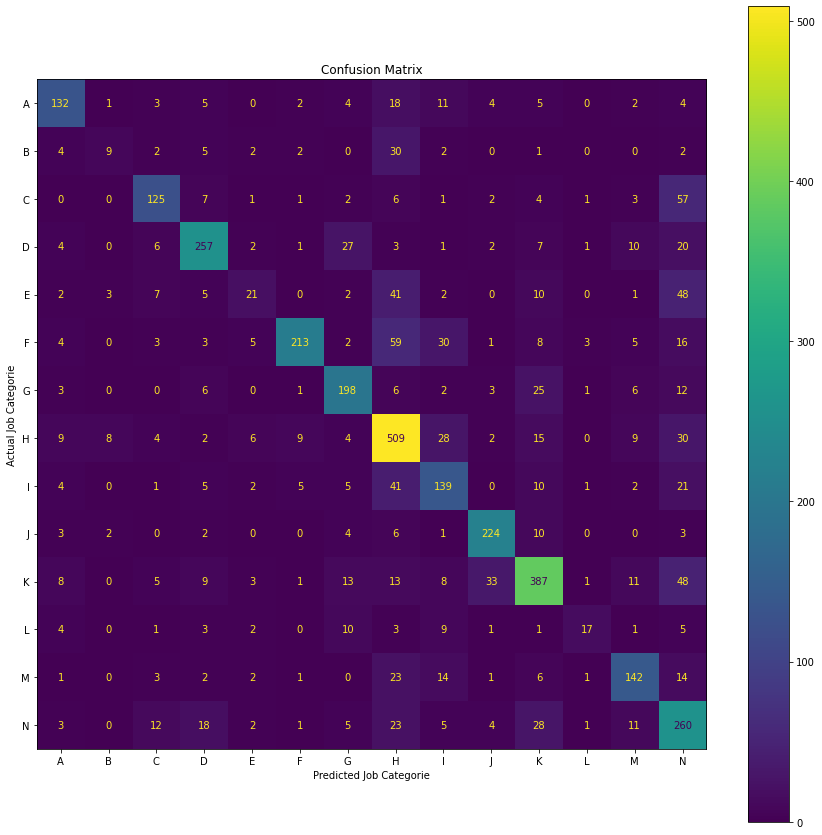

In [129]:
cm = confusion_matrix(y_test, y_prediction)

cmd_obj = ConfusionMatrixDisplay(cm, display_labels=list(df_val.sort_values("categorie")["categorie"].unique()))
cmd_obj.plot()
cmd_obj.ax_.set(title='Confusion Matrix', 
                xlabel='Predicted Job Categorie', 
                ylabel='Actual Job Categorie',)

plt.rcParams["figure.figsize"] = (15,15)
plt.show()

In [130]:
print(metrics.classification_report(y_test, y_prediction, target_names=list(df_train["categorie"].unique())))

              precision    recall  f1-score   support

           I       0.73      0.69      0.71       191
           N       0.39      0.15      0.22        59
           K       0.73      0.60      0.65       210
           G       0.78      0.75      0.77       341
           H       0.44      0.15      0.22       142
           A       0.90      0.61      0.72       352
           M       0.72      0.75      0.73       263
           L       0.65      0.80      0.72       635
           D       0.55      0.59      0.57       236
           B       0.81      0.88      0.84       255
           F       0.75      0.72      0.73       540
           E       0.63      0.30      0.40        57
           J       0.70      0.68      0.69       210
           C       0.48      0.70      0.57       373

    accuracy                           0.68      3864
   macro avg       0.66      0.60      0.61      3864
weighted avg       0.69      0.68      0.67      3864



# Oversampling